# Unsupervised Machine Learning Clustering

Importing the libraries and Data

In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy
import matplotlib.ticker as ticker
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import pylab as pl

In [144]:
#creating the path
path = r'C:\Users\graha\Desktop\Career foundry\Chapter 6\Wind Turbine Scada\02 Data\Prepared Data'

In [145]:
df_gwt = pd.read_csv(os.path.join(path, 'German_wind_turbines_cleaned.csv'))

In [146]:
df_gwt.head()

,Country,State,District,Postal Code,location,Longitude,Latitude,Commissioning Date,Unit Operation Status,Gross Performance,...,Technology,Type Design,Hub Height,Rotor Diameter,Planned Commissioning Dtae,Sea Location,ClusterNordsee,Water Depth,Distance From Coastline,ClusterOstsee
0,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.739374,51.270068,9/1/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
1,Deutschland,Schleswig-Holstein,Segeberg,23824.0,Damsdorf,10.299400,54.073831,9/28/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,135.40,115.70,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.733069,51.272164,9/4/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
3,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.748361,51.270462,8/31/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
4,Deutschland,Nordrhein-Westfalen,Heinsberg,52525.0,Heinsberg,6.045546,51.029548,1/11/2017,In Betrieb,2400.0,...,Horizontalläufer,N117,120.00,116.80,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_gwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     34484 non-null  object 
 1   State                       34484 non-null  object 
 2   District                    32700 non-null  object 
 3   Postal Code                 32700 non-null  float64
 4   location                    32700 non-null  object 
 5   Longitude                   33589 non-null  float64
 6   Latitude                    33589 non-null  float64
 7   Commissioning Date          32020 non-null  object 
 8   Unit Operation Status       34484 non-null  object 
 9   Gross Performance           34484 non-null  float64
 10  Net Rated Power             34484 non-null  float64
 11  Name of Windpark            33674 non-null  object 
 12  Position                    34484 non-null  object 
 13  Manufacturer                340

In [148]:
df_gwt.isnull().sum()

Country                           0
State                             0
District                       1784
Postal Code                    1784
location                       1784
Longitude                       895
Latitude                        895
Commissioning Date             2464
Unit Operation Status             0
Gross Performance                 0
Net Rated Power                   0
Name of Windpark                810
Position                          0
Manufacturer                    449
Technology                        0
Type Design                     464
Hub Height                      853
Rotor Diameter                  453
Planned Commissioning Dtae    32021
Sea Location                  32700
ClusterNordsee                33008
Water Depth                   32834
Distance From Coastline       32834
ClusterOstsee                 34176
dtype: int64

In [149]:
df_gwt.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34479    False
34480    False
34481    False
34482    False
34483    False
Length: 34484, dtype: bool

In [150]:
df_gwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     34484 non-null  object 
 1   State                       34484 non-null  object 
 2   District                    32700 non-null  object 
 3   Postal Code                 32700 non-null  float64
 4   location                    32700 non-null  object 
 5   Longitude                   33589 non-null  float64
 6   Latitude                    33589 non-null  float64
 7   Commissioning Date          32020 non-null  object 
 8   Unit Operation Status       34484 non-null  object 
 9   Gross Performance           34484 non-null  float64
 10  Net Rated Power             34484 non-null  float64
 11  Name of Windpark            33674 non-null  object 
 12  Position                    34484 non-null  object 
 13  Manufacturer                340

In [151]:
df_ml = df_gwt[['Gross Performance', 'Net Rated Power','Hub Height', 'Rotor Diameter',]]

In [152]:
df_ml.head()

,Gross Performance,Net Rated Power,Hub Height,Rotor Diameter
0,3000.0,3000.0,149.08,115.71
1,3000.0,3000.0,135.40,115.70
2,3000.0,3000.0,149.08,115.71
3,3000.0,3000.0,149.08,115.71
4,2400.0,2400.0,120.00,116.80


In [153]:
df_ml.isnull().sum()

Gross Performance      0
Net Rated Power        0
Hub Height           853
Rotor Diameter       453
dtype: int64

In [154]:
df_ml = df_ml.dropna()

In [155]:
df_ml.isnull().sum()

Gross Performance    0
Net Rated Power      0
Hub Height           0
Rotor Diameter       0
dtype: int64

### Elbow Technique

In [156]:
# Define the range of potential clusters in the dataset
num_cl = range(1, 10)

# Define KMeans clusters in the range we assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

# Fit the KMeans models and calculate scores
score = [kmeans[i].fit(df_ml).score(df_ml) for i in range(len(kmeans))]

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

In [157]:
score

[-167471565718.368,
 -68362064227.904396,
 -35391094734.83754,
 -18241311091.352947,
 -10652822968.9199,
 -7904245896.929747,
 -5310274007.235201,
 -4330451595.124848,
 -3616926465.8298807]

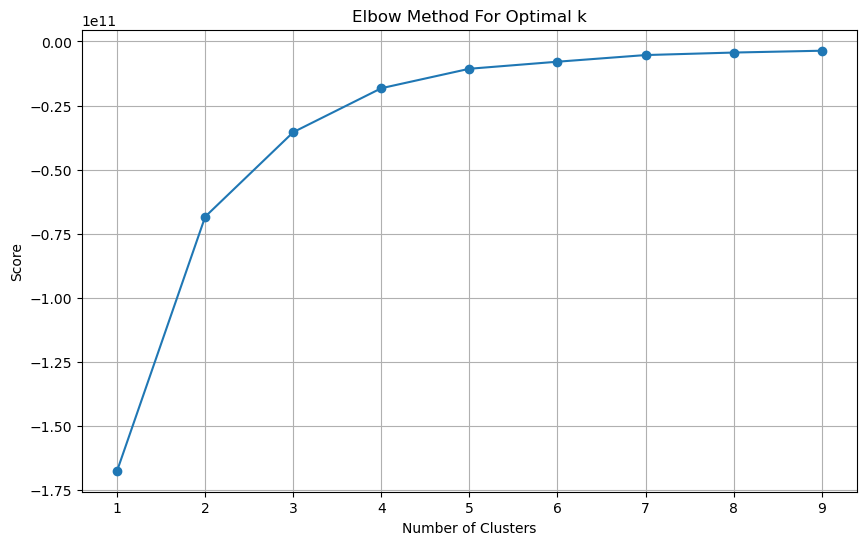

In [172]:
# Number of clusters
num_cl = range(1, 10)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(num_cl, score, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(num_cl)
plt.grid(True)
plt.show()

we will use 4 clusters as that is where the curve really starts to flatten.

## K-Means Clustering

In [159]:
# Creating the k-means object
kmeans = KMeans(n_clusters=4)

In [160]:
# Fitting the k-means object to the data
kmeans.fit(df_ml)

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [161]:
df_ml['clusters']= kmeans.fit_predict(df_ml)

C:\Users\graha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [162]:
df_ml.head()

,Gross Performance,Net Rated Power,Hub Height,Rotor Diameter,clusters
0,3000.0,3000.0,149.08,115.71,1
1,3000.0,3000.0,135.40,115.70,1
2,3000.0,3000.0,149.08,115.71,1
3,3000.0,3000.0,149.08,115.71,1
4,2400.0,2400.0,120.00,116.80,0


In [163]:
df_ml['clusters'].value_counts()

clusters
0    15342
1     8409
3     7105
2     2660
Name: count, dtype: int64

### Gross Performance / Net Rated Power

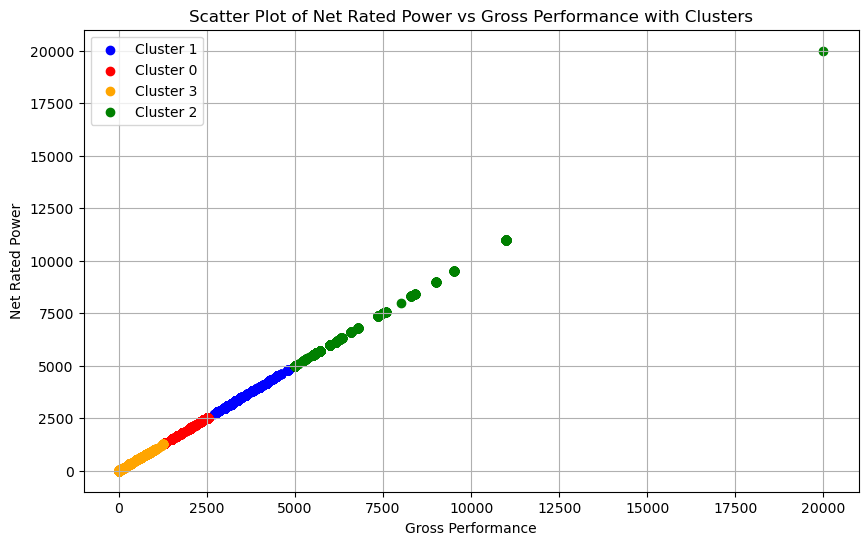

In [164]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
for cluster in df_ml['clusters'].unique():
    plt.scatter(df_ml[df_ml['clusters'] == cluster]['Gross Performance'], 
                df_ml[df_ml['clusters'] == cluster]['Net Rated Power'], 
                color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Net Rated Power vs Gross Performance with Clusters')
plt.xlabel('Gross Performance')
plt.ylabel('Net Rated Power')
plt.legend()
plt.grid(True)
plt.show()

### Gross Performance/ Hub Height

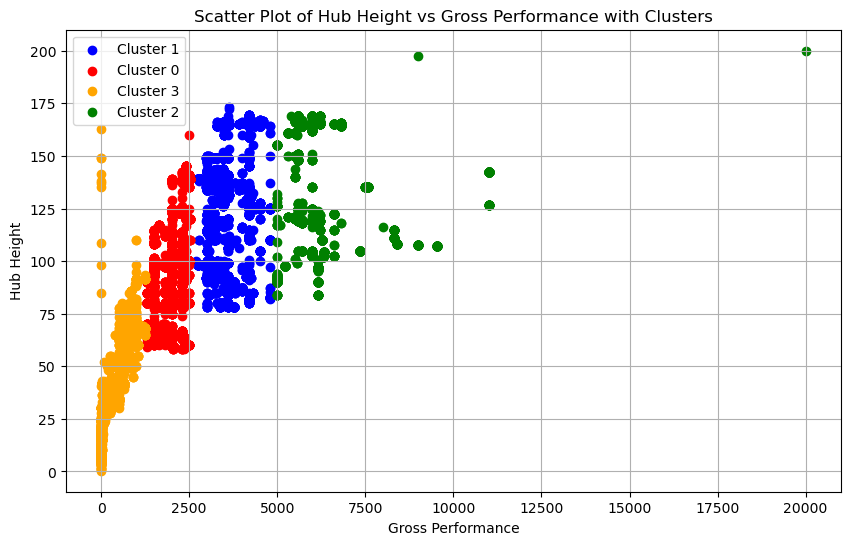

In [165]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
for cluster in df_ml['clusters'].unique():
    plt.scatter(df_ml[df_ml['clusters'] == cluster]['Gross Performance'], 
                df_ml[df_ml['clusters'] == cluster]['Hub Height'], 
                color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Hub Height vs Gross Performance with Clusters')
plt.xlabel('Gross Performance')
plt.ylabel('Hub Height')
plt.legend()
plt.grid(True)  
plt.show()

### Gross Performance / Rotor Diameter

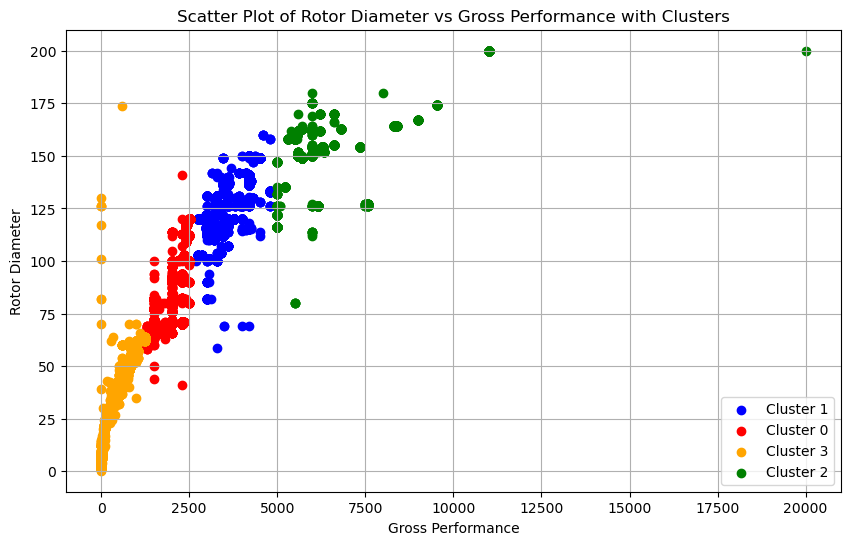

In [166]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
for cluster in df_ml['clusters'].unique():
    plt.scatter(df_ml[df_ml['clusters'] == cluster]['Gross Performance'], 
                df_ml[df_ml['clusters'] == cluster]['Rotor Diameter'], 
                color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Rotor Diameter vs Gross Performance with Clusters')
plt.xlabel('Gross Performance')
plt.ylabel('Rotor Diameter')
plt.legend()
plt.grid(True)
plt.show()

### Hub Height / Rotor Diameter

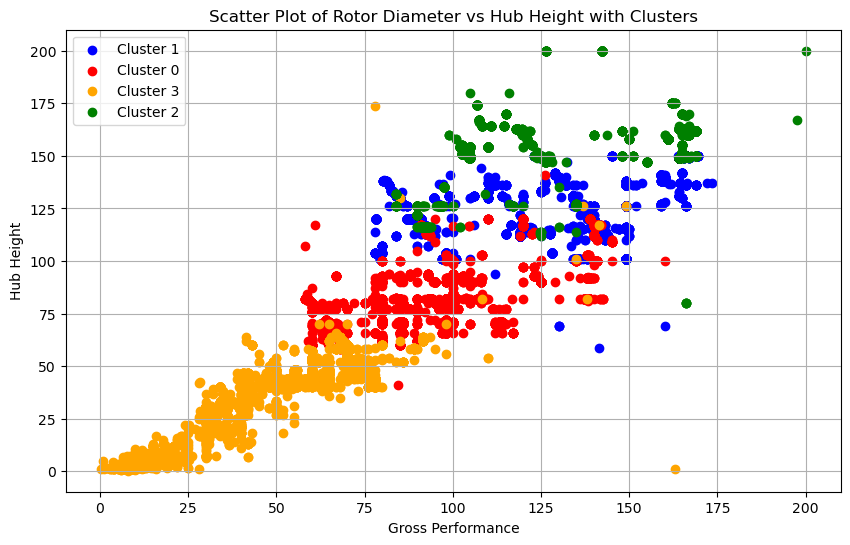

In [167]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
for cluster in df_ml['clusters'].unique():
    plt.scatter(df_ml[df_ml['clusters'] == cluster]['Hub Height'], 
                df_ml[df_ml['clusters'] == cluster]['Rotor Diameter'], 
                color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Rotor Diameter vs Hub Height with Clusters')
plt.xlabel('Gross Performance')
plt.ylabel('Hub Height')
plt.legend()
plt.grid(True)  
plt.show()

## 3D Plotting

### Gross Performance / Hub Height / Rotor Diameter

In [168]:
import plotly.graph_objects as go


# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'} 

# Create a trace for each cluster
traces = []
for cluster in df_ml['clusters'].unique():
    cluster_data = df_ml[df_ml['clusters'] == cluster]
    trace = go.Scatter3d(
        x=cluster_data['Gross Performance'],
        y=cluster_data['Hub Height'],
        z=cluster_data['Rotor Diameter'],
        mode='markers',
        marker=dict(color=colors[cluster]),
        name=f'Cluster {cluster}'
    )
    traces.append(trace)

# Create layout for the plot
layout = go.Layout(
    title='3D Scatter Plot of Gross Performance, Hub Height, and Rotor Diameter',
    scene=dict(
        xaxis=dict(title='Gross Performance'),
        yaxis=dict(title='Hub Height'),
        zaxis=dict(title='Rotor Diameter')
    )
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

### Conclusion

##### Net Rated Power
there is a direct correlation between these two aspects. we can see clear groupings with no verlap which is no surprise given that they have the same values.
there is a positive slope which clearly represents a positive relationship between the two.
this type of graph i would say is a clear representation of overfitting.

##### Gross Performance vs Hub Height and Rotor Diameter
for both gross performance and hub Height vs the Gross Performance we can see clearly defined clustering.

For the first clsuter we see very little improvement of gross performance. there is quite a steep rise for both Hub Height and Rotor Diameter
The Second cluster is where we start to see some improvement in the relationship between Gross Performance vs Hub Height and Rotor Diameter.
cluster 3 and 4 is where we start to see more of a relationship between the two

Hub Height has a much larger spread in cluster 3 and 4. this is likely due to the location of the turbines. in forests and mounatins they will have taller towers to get the clean wind. in flat areas or close to the ocean as wel as in the ocean there will be shorter towers.

Rotor Diameter is much less spread but follows similar trend. the Rotor Diameter here clearly has a much closer relationship to Gross Performance.

The clusters are very clearly defined with these elemnts and there isnt much overlapping at all. This suggests that the clustering algorithm has effectively identified distinct groups within the data.

##### Hub Height vs Rotor Diameter
The plot here show some definition to our clustering however there is a bit of over lapping between the clusters.
the points do follow the same trend which suggest hrere is a relationship between the two.

##### 3D Plot
this plot illustrates what have previously said about Gross Performance vs Hub Height and Rotor Diameter perfectly. almost all data points follow the same trend. there is some spread but within accpetable and understandable tolerances.
Again the clusters are very clearly defined with these elemnts and there isnt much overlapping at all. This suggests that the clustering algorithm has effectively identified distinct groups within the data.

### Descriptive Statistics

In [169]:
df_ml['clusters'].value_counts()

clusters
0    15342
1     8409
3     7105
2     2660
Name: count, dtype: int64

In [170]:
#renaming the clusters
df_ml.loc[df_ml['clusters']==0, 'clusters'] = 'Red'
df_ml.loc[df_ml['clusters']==1, 'clusters'] = 'Blue'
df_ml.loc[df_ml['clusters']==2, 'clusters'] = 'Green'
df_ml.loc[df_ml['clusters']==3, 'clusters'] = 'Orange'

In [171]:
df_ml.groupby('clusters').agg({'Gross Performance':['mean', 'median'],
                           'Net Rated Power':['mean', 'median'],
                           'Hub Height':['mean', 'median'],
                           'Rotor Diameter':['mean', 'median']})

Gross Performance         Net Rated Power          Hub Height         \
                      mean  median            mean  median        mean median   
clusters                                                                        
Blue           3421.778511  3300.0     3421.778511  3300.0  128.192460  135.4   
Green          6240.862406  5700.0     6240.862406  5700.0  131.213868  125.0   
Orange          582.219955   600.0      582.219955   600.0   57.661034   65.0   
Red            1949.030830  2000.0     1949.030830  2000.0   96.101818   98.0   

         Rotor Diameter          
                   mean  median  
clusters                         
Blue         119.430290  115.71  
Green        152.639323  154.00  
Orange        41.530848   44.00  
Red           80.234231   80.00

### Conclusions

##### Interpretation:
-   Gross Performance and Net Rated Power: These two features seem to have relatively high mean and median values in the Blue cluster compared to other clusters. The mean and median values for the Green cluster are slightly lower, followed by the Red cluster, and then the Orange cluster, which has the lowest values.
-   Hub Height and Rotor Diameter: The mean and median values for Hub Height and Rotor Diameter also vary across clusters. The Blue cluster tends to have higher values for both features compared to other clusters. The Green cluster follows with slightly lower values, then the Red cluster, and finally the Orange cluster with the lowest values.

##### Cluster Characteristics:
Based on the mean and median values, we can infer certain characteristics of each cluster:
-   Blue Cluster: This cluster appears to have the highest values for Gross Performance, Net Rated Power, Hub Height, and Rotor Diameter among all clusters, indicating that it may represent wind turbines with higher performance and larger physical dimensions.
-   Green Cluster: This cluster has slightly lower values compared to the Blue cluster but higher than the Red and Orange clusters, suggesting moderate performance and dimensions.
-   Red Cluster: The Red cluster has lower values for all features compared to the Blue and Green clusters, indicating lower performance and smaller physical dimensions.
-   Orange Cluster: This cluster has the lowest values for all features, suggesting the lowest performance and smallest physical dimensions among all clusters.

over all i would say this model has been succesfull at learning and clustering our data. the data is inline with all our previous analysis and has provided some valuable insights.